# COGS 108 - Dianping Hot-Pot Analysis

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

**ADD COMMENT HERE**

# Names

- Jou-Ying Lee
- Niehao Chen
- Junwei Chen
- Dandan Liu
- Wanting Yang

<a id='research_question'></a>
# Research Question

How are Hot Pot businesses different in first-tier cities and third-tier cities in China? Specifically, how do customer evaluations of restaurant services, environments, tastes, prices and comments reveal differences between Shanghai and Jingzhou's Hot Pot businesses?

<a id='background'></a>

## Background & Prior Work

This research will study how hot pot restaurants and food catering differ in first and third-tier cities in China, specifically in Shanghai and Jingzhou. The "first-tier city" refers to an unofficial classification of Chinese cities based on multiple factors, such  as economy level, consumption level, population, transportation, and etc. In this project, we are comparing hot pot restaurants of cities from different tiers: Shanghai--1st tier; Jingzhou--3rd tier.  

Shanghai, also known as "The Pearl of Asia", is one of the largest and most developed metropolis in the world. Coming with its global trading business and major commercial activies, it is also classified as one of the only four first-tier cities in China.

Jingzhou, which is a small city in Hubei Province, occupies a great amount of historical and cultural settlements in China, as it preserves plenty of ancient relics and heritage sites. Besides its important cultural contribution, Jingzhou has been continuously building its diversified economic portfolio, and has today, slowly come to be recognized on its financial growth, earning itself with a respectful fame among third-tier cities in China.

What might have added to Jingzhou's fame along the way, interestingly, might be its Hot Pots business. Chinese people love their hot pots, and while this dish is much-loved and welcomed all over the country, Jingzhou stands out with its unique flavors and caterings on hot pots.

With this in mind, this project hopes to look into how hot pot offerings and businesses differ in first and third tier cities in China, specifically in Shanghai and Jingzhou. Customer reviews on these restaurants are made available by one of the most-used apps in the Chinese mobile app market -- DaZhongDianPing(大众点评), which is similar to the app--Yelp. Information, not limited to customers' evaluations on restaurant tastes, environments, services, prices and comments will be utilized for analytics. We also found some helpful examples of how people acquire and process data from DaZhongDianPing (see the link in the reference below), which is using Python Crawling approaches. Thus, in this project, we will use similar methods to get our data from DaZhongDianPing.


References (include links):
The following are two blogs we found on references for this work. As DaZhongDianPing is a Chinese application, most relevant work are also documented in Chinese. However, an English-translated version of the first blog is found, and is also included below for references.
- 1) [Blog: Chengdu Hot Pot Resturant Analysis](https://blog.csdn.net/NNNJ9355/article/details/103738607)  (Chinese)
[Same Blog Translated](http://codestudyblog.com/cnb2001/0124093023.html) (English)<br>
This work shows a rather complete project pipeline from data acquisition to data presentation. The author documented his approach to scraping needed data, and pointed out key notes to watch out for during data scraping and cleaning stage. This blog also briefly summarizes statistical findings in the data by visualizing feature distributions as well as some other principal statistical plots.
- 2) [Blog: DianPing Country-Wide Restaurant Comparison](https://www.programmersought.com/article/87735251333/)
This work shows a different approach to structuring this project, and it starts with working with mixed data from the website, instead of a narrowed-down dish or restaurant location. It compares the proportions of locations of restaurants and displays daily statistical summaries on a country-wide level. Visualizations on this blog also provide interesting insights into relationships between cities and food ratings.


# Hypothesis


Based on our cultural background and knowledge of Chinese society, we hypothesize that compared to Hotpot restaurants in Jingzhou, more comments and evaluations will be made for restaurants in Shanghai due to a larger population; prices and average ratings for environments will also be higher in Shanghai since Shanghai has a higher consumption level and a more developed catering industry. Also, as Shanghai is a more globalized and economically developed city compared to Jingzhou, a greater variety of food will be offered in Shanghai for consumers from different regions domestically and internationally.

On the other hand, we hypothesize that overall ratings for Hotpot restaurants in Shanghai will be lower than Jingzhou because as an international metropolis, it is hard for a restaurant to suit everyone's taste.

# Dataset(s)

- Dataset Name: Dianping - Shanghai Hotpot Dataset
- Link to the dataset: [Shanghai_Data](https://www.heywhale.com/mw/dataset/5e0874052823a10036b0d94b/file)
- Number of observations: 749<br>
- Description: This is a dataset made available by user: KOTO on [heywhale.com](https://www.heywhale.com/home). It includes hotpot restaurant information scraped from [dianping.com](http://www.dianping.com/), and contains listings on Shanghai city only.


- Dataset Name: Dianping - Jingzhou Hotpot Dataset
- Link to the dataset: [Jingzhou_Data](https://github.com/Yonfan/Python/blob/5db2699d13b7a3f8a5bab56a87f999e72363d983/16_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90/dataDir/hotpotdata.csv)
- Number of observations: 750<br>
- Description: This is a dataset made available by user: Yonfan on [GitHub](https://github.com/Yonfan). It includes hotpot restaurant information scraped from [dianping.com](http://www.dianping.com/), and contains listings on Jingzhou city only.

For the purpose of comparison across cities, two seperate datasets from the places' restaurant listings are obtained. These datasets are carefully picked after inspection into their data formats, sources and availability. The two datasets are scraped with the same web crawler script contributed by another user on GitHub, and therefore the data contain the exact same features (i.e. column names) saved as csv formats. Combination of the two datasets would therefore be rather simple and can be accomplished via a simple concatenation.

# Setup

In [2]:
# !pip install jieba
# !pip install palettable

In [4]:
import pandas as pd
import numpy as np
import random

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans

from IPython.display import display, HTML
from ipywidgets import widgets, Layout
from PIL import Image
import imageio

from palettable.colorbrewer.sequential import OrRd_9
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba

ImportError: cannot import name 'WordCloud' from 'wordcloud' (unknown location)

In [5]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 999)

# Data Cleaning

Both of the datasets are obtained in its original formats, and have been cleaned by the content creaters themselves. Each column types have been inspected, and contents under each feature have been reviewed to have no unrelated contents. While there are null values in corresponding columns, for they can not be simply imputed with single values, further EDA would need to be carried out before imputations can be performed.

The column "url" contains the exact url the listing is scraped from in the first place. It serves a function close to identity recognizer for each entry, and is therefore unnecessary for our analysis going forward. Due to this reason, we drop the correponding column from both of the datasets.

In [6]:
jz = pd.read_csv('data/hp_荆州.csv')
sh = pd.read_csv('data/hp_sh.csv')

In [5]:
display(jz.head(1))
display(jz.head(1))

,name,url,star,comment,avg_price,taste,environment,services,recommend
0,鲜蒸牛肉特色餐厅(园林北路店),http://www.dianping.com/shop/121937322,准四星商户,9.0,NaN,7.5,7.5,7.5,"香菜牛筋丸,手切牛肉,葱花饼"


,name,url,star,comment,avg_price,taste,environment,services,recommend
0,鲜蒸牛肉特色餐厅(园林北路店),http://www.dianping.com/shop/121937322,准四星商户,9.0,NaN,7.5,7.5,7.5,"香菜牛筋丸,手切牛肉,葱花饼"


In [6]:
print('Sample Entries on JingZhou Hot Pot Restaurants')
display(jz.head(3))
print('Sample Entries on Shanghai Hot Pot Restaurants')
display(sh.head(3))

Sample Entries on JingZhou Hot Pot Restaurants


,name,url,star,comment,avg_price,taste,environment,services,recommend
0,鲜蒸牛肉特色餐厅(园林北路店),http://www.dianping.com/shop/121937322,准四星商户,9.0,NaN,7.5,7.5,7.5,"香菜牛筋丸,手切牛肉,葱花饼"
1,王保长刀叉牛肉,http://www.dianping.com/shop/79207961,四星商户,241.0,31.0,8.0,8.0,8.0,"斤牛肉,香菜牛肉丸,鱼丸"
2,公安县刘一手火锅店,http://www.dianping.com/shop/90545667,三星商户,67.0,NaN,6.3,6.3,6.3,"鲜虾包心鱼丸,豆芽,包心鱼丸"


Sample Entries on Shanghai Hot Pot Restaurants


,name,url,star,comment,avg_price,taste,environment,services,recommend
0,蜀城巷子老成都火锅(宜山路店),http://www.dianping.com/shop/110269910,准五星商户,545,122,8.6,8.4,8.5,"蜀城嫩鲜牛肉,毛肚,鸭血"
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),http://www.dianping.com/shop/98281287,五星商户,602,313,8.8,9.1,9.0,"安格斯牛肉寿喜锅,刺身拼盘,澳洲和牛寿喜烧"
2,小肥羊(光启城时尚购物中心店),http://www.dianping.com/shop/72351070,准五星商户,4308,1,9.0,8.9,8.9,"特色羔羊肉,鸳鸯锅,招牌豪气羊肉串"


### Drop Columns
`url` is the website url corresponding to each restaurant's page on dianping.com, i.e. the original webpage address from where each listing was crawled from. Here, it serves as a unique identifier for each listing, and therefore is not helpful for our analysis going forward. It is therefore dropped from our original tables.

In [7]:
# drop unnecessary columns for analysis
jz.drop('url', axis=1, inplace = True)
sh.drop('url', axis=1, inplace = True)

We further inspect into entries with null values. There are 8 features in total with respect to each table. `Name` refers to each listing's restaurant name, and therefore it makes sense for there to be no null values in this column. We select entries that have more than 5 null values in a row. There lack information in most useful features, and are therefore dropped from our input to analysis.

In [8]:
jz = jz.loc[jz.isnull().sum(axis=1)<5]

   We notice that there are entries without information on `star` column in JingZhou. Further inspecting into these listings, we see that almost all of these restaurants are missing data in all other features as well. Looking into information in the `recommend` column, it is then understood that these listings are of new openings, and therefore lack information on a lot of the entries. On this ground, we proceed with dropping these listings, as their missing information does not help with our analysis going forward.

In addition, there are also entries with null values in all `taste`, `envinronment` and `services` columns. We drop the 3 listings with this condition as too much missing information in one listing does not help with our analyses.

In [9]:
# "该商户暂无星级" means "no star rating"
drop_star_idx = jz.loc[jz.star == '该商户暂无星级'].index
drop_feat_idx=jz.loc[(pd.isna(jz.taste) & pd.isna(jz.environment) & pd.isna(jz.services))].index
# jz.drop(drop_idx, inplace=True)
jz.drop(drop_feat_idx, inplace=True)
jz = jz.reset_index(drop=True)

### Data Encoding
Encode `star` column

In [10]:
stars = set(list(jz.star.unique())+list(sh.star.unique()))
stars

{'三星商户', '五星商户', '准五星商户', '准四星商户', '四星商户'}

In [11]:
star_dict = {'三星商户': 3,
             '准四星商户': 3.5,
             '四星商户': 4,
             '准五星商户': 4.5,
             '五星商户': 5}

In [12]:
jz.star = jz.star.replace(star_dict)
sh.star = sh.star.replace(star_dict)

For column `recommend`, we save the text information in new dataframes for later uses.<br>
In order to better make use of column `recommend`, we count the number of dishes recommended in each entry, and replace them with integers instead.

In [13]:
jz_dish = jz[['recommend']]
sh_dish = sh[['recommend']]

In [14]:
def label_recom(x):
    if x == ',,':
        x = 0
    else:
        x = len(x.split(','))
    return x

In [15]:
jz.recommend = jz.recommend.apply(label_recom)
sh.recommend = sh.recommend.apply(label_recom)

The following is an overview on Jingzhou and Shanghai's dataset with cleaning performed up to this point. It can be seen that Shanghai's dataset is more complete and cleaner than Jingzhou's. In order to take care of the rest of null values in Jingzhou's data columns, a thorough EDA is carried out below to better understand our dataset. Missing data are expected to be imputed in a rigorous approach after careful reflection and inspection into the data.

In [16]:
display(jz.info())
display(sh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         434 non-null    object 
 1   star         434 non-null    float64
 2   comment      434 non-null    float64
 3   avg_price    150 non-null    float64
 4   taste        434 non-null    float64
 5   environment  434 non-null    float64
 6   services     434 non-null    float64
 7   recommend    434 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 27.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         749 non-null    object 
 1   star         749 non-null    float64
 2   comment      749 non-null    int64  
 3   avg_price    749 non-null    int64  
 4   taste        749 non-null    float64
 5   environment  749 non-null    float64
 6   services     749 non-null    float64
 7   recommend    749 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 46.9+ KB


None

# Data Analysis & Results

Below is a display of high-level statistics in regards to dataset on Jingzhou and Shanghai.

In general, the star, comment, average price, taste, environment and services for Shanghai is greater than Jingzhou. However, in average, more people recommend Jingzhou because of the low price.

In [17]:
display(jz.describe())
display(sh.describe())

,star,comment,avg_price,taste,environment,services,recommend
count,434.000000,434.000000,150.000000,434.000000,434.000000,434.000000,434.000000
mean,3.418203,340.509217,43.760000,7.169585,7.172350,7.171198,2.543779
std,0.303354,1585.239390,20.497071,0.413732,0.423578,0.421177,1.078520
min,3.000000,1.000000,1.000000,6.200000,6.200000,6.200000,0.000000
25%,3.000000,4.000000,29.000000,6.900000,6.900000,6.900000,3.000000
50%,3.500000,23.000000,40.000000,7.100000,7.100000,7.100000,3.000000
75%,3.500000,140.250000,56.750000,7.400000,7.400000,7.400000,3.000000
max,5.000000,26034.000000,100.000000,9.100000,9.100000,9.100000,3.000000


,star,comment,avg_price,taste,environment,services,recommend
count,749.000000,749.000000,749.000000,749.000000,749.00000,749.000000,749.0
mean,4.712283,2742.578104,155.116155,8.870360,8.77984,8.804272,3.0
std,0.296474,4524.476786,135.885101,0.259787,0.37199,0.356990,0.0
min,3.500000,13.000000,1.000000,7.700000,6.80000,7.300000,3.0
25%,4.500000,405.000000,105.000000,8.700000,8.60000,8.600000,3.0
50%,4.500000,1049.000000,133.000000,9.000000,8.90000,8.900000,3.0
75%,5.000000,3260.000000,148.000000,9.100000,9.10000,9.100000,3.0
max,5.000000,41585.000000,1073.000000,9.400000,9.40000,9.400000,3.0


Dataset is merged for visualization purposes. Labels to identify where each restaurant belongs to is given to each entry in an extra column `location`, where **jz** stands for JingZhou, and **sh** represents for Shanghai.

In [18]:
df = pd.concat([jz.assign(location=['jz']*len(jz)), sh.assign(location=['sh']*len(sh))])
df.head(3)

,name,star,comment,avg_price,taste,environment,services,recommend,location
0,鲜蒸牛肉特色餐厅(园林北路店),3.5,9.0,NaN,7.5,7.5,7.5,3,jz
1,王保长刀叉牛肉,4.0,241.0,31.0,8.0,8.0,8.0,3,jz
2,公安县刘一手火锅店,3.0,67.0,NaN,6.3,6.3,6.3,3,jz


#### Univariate Analysis
Inspect variables' count distributions

Look into `comment` column

The following graphs show that both Shanghai and Jingzhou have a higher density of comments around 0-50. However, Shanghai tends to own large number of comments while Jingzhou tends to own small number comments.

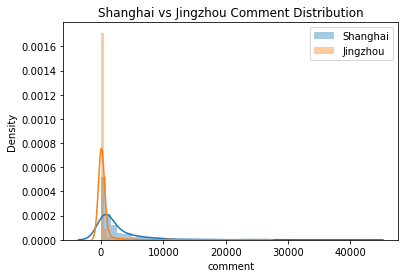

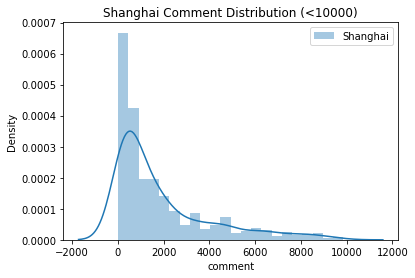

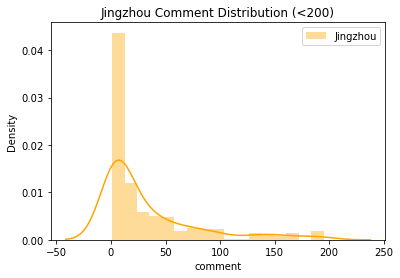

In [19]:
plt.figure()
sns.distplot(sh.comment,label='Shanghai')
sns.distplot(jz.comment, label='Jingzhou')
plt.legend()
plt.title('Shanghai vs Jingzhou Comment Distribution')
plt.show()
plt.figure()
sns.distplot(sh.comment[sh.comment<10000], label='Shanghai')
plt.legend()
plt.title('Shanghai Comment Distribution (<10000)')
plt.show()
plt.figure()
sns.distplot(jz.comment[jz.comment<200],color='orange',label='Jingzhou')
plt.title('Jingzhou Comment Distribution (<200)')
plt.legend()
plt.show()

Look into `taste` column

The next graph shows that Jingzhou has a higher density of taste around 7 and Shanghai has a higher density of taste around 9. Generally, Shanghai has a larger average taste point than Jingzhou.

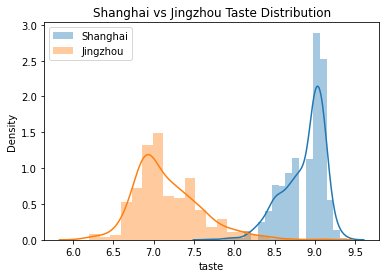

In [20]:
plt.figure()
sns.distplot(sh.taste,label='Shanghai')
sns.distplot(jz.taste, label='Jingzhou')
plt.legend()
plt.title('Shanghai vs Jingzhou Taste Distribution')
plt.show()

Look into `environment` column

The next graph shows that the environment point in Shanghai has a higher density around 9.0 while the environment point in Jingzhou has a higher density around 7.0. Generlly, Jingzhou has a smaller environment point value than Shanghai.

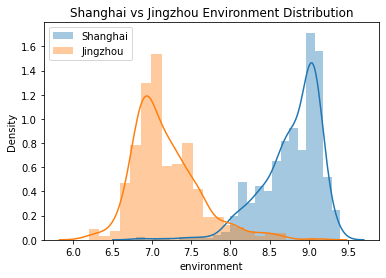

In [21]:
plt.figure()
sns.distplot(sh.environment,label='Shanghai')
sns.distplot(jz.environment, label='Jingzhou')
plt.legend()
plt.title('Shanghai vs Jingzhou Environment Distribution')
plt.show()

Look into `services` column

The next graph shows that the service point in Shanghai has a higher density around 9.0 while the service point in Jingzhou has a higher density around 7.0. Generlly, Jingzhou has a smaller service point value than Shanghai.

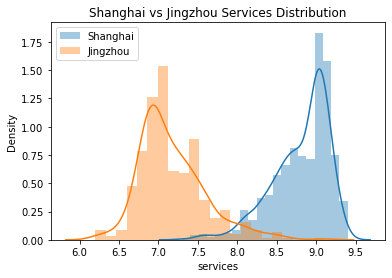

In [22]:
plt.figure()
sns.distplot(sh.services,label='Shanghai')
sns.distplot(jz.services, label='Jingzhou')
plt.legend()
plt.title('Shanghai vs Jingzhou Services Distribution')
plt.show()

Look into `star` column <br>
* It is important to notice that for there are a number of entries dropped above for listings in Jingzhou, therefore pure number counts cannot be performed for comparison between the two cities. Percentage analysis is therefore carried out for fairer inspection.

From graph below, it shows that for Jingzhou, more restaurants locates in the range of 3-4 stars while more Shanghai restaurants are locating between 4-5 stars.

In [23]:
star_perc = df.groupby(['location'])['star'].value_counts(normalize=True).rename('percentage').reset_index()

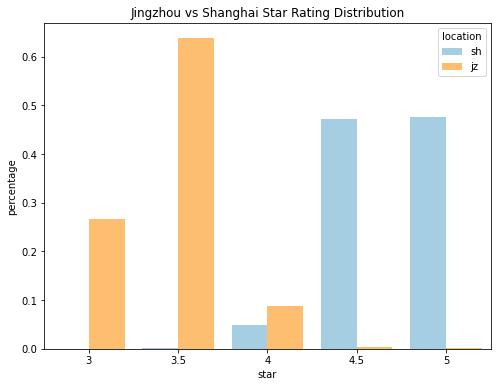

In [24]:
plt.figure(figsize = (8,6))
sns.barplot(data = star_perc, x = 'star', y = 'percentage', order = [3, 3.5, 4, 4.5, 5], hue='location',hue_order=['sh','jz'],palette={'jz':'#fdbf6f','sh':'#a6cee3'},saturation=1)
plt.title('Jingzhou vs Shanghai Star Rating Distribution')
plt.show()

### Data Analysis
Look into `avg_price` column

The following boxplot shows that the average price in Jingzhou(jz) has a mean around 50 while the average price in Shanghai has a mean around 150. Moreover, Jingzhou has a few high price outliers in the graph while Shanghai has a lot of high price outliers way up to 1000.

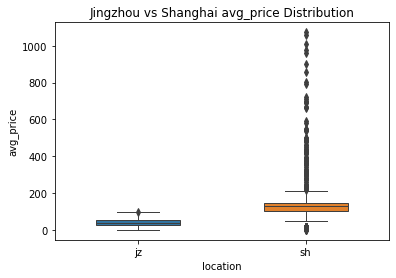

In [26]:
plt.figure()
sns.boxplot(data=df, x='location',y='avg_price',width=0.5,linewidth=1)
plt.title('Jingzhou vs Shanghai avg_price Distribution')
plt.show()

#### Bivariate Analysis
Here we focus mainly on analysing different location's `price`'s relation with other features in the dataset.

`avg_price` vs `star`

Belows show violin plots of restaurants' average price across star ratings for Jingzhou versus Shanghai's hotpot places.

Violin plot draws the combination of boxplot and kernel density estimate, and is therefore useful in showing quantitative distribution across the different levels compared.

In this violin plot, we can see clearly the distribution of star ratings and average prices in both cities. First of all, Jingzhou’s star rating is mostly concentrated around 3-4 stars where Shanghai’s hot pot restaurants are concentrated from 4-5 stars. Also, there is a significant difference in the price distribution where Shanghai has few data with distributions of up to 1000 yuan, but Jingzhou’s average price is mostly below 200 yuan. Furthermore, from the shape of the violin plot on each level, we can see that the distribution shape of Jingzhou’s 3-star restaurants’ average price are bimodal; 3.5 star restaurants’ average price are slightly skewed to the right and 4 star restaurants’ average price are normally distributed. For Shanghai, their range of average price is larger than all levels of Jingzhou’s restaurants; 4-star and 5-star restaurants have normal distributions in their average prices; 4.5-star restaurants have a skewed price distribution around 200 yuan. Lastly, we can notice that the average price for Shanghai’s 4-5 star hot pot restaurants have the most expensive average price(4.5 star’s price is up to 800 yuan and 5 star restaurants have price up to 1200 yuan. Therefore, both of Shanghai’s high-starred(>4 star) hot pot places and average price are greater than Jingzhou’s hot pot places.

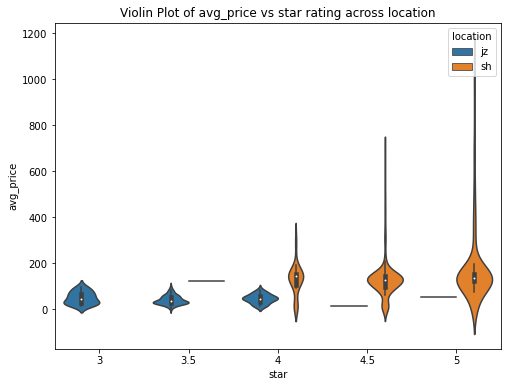

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(x=df.star, y=df.avg_price, hue=df.location, order=[3,3.5,4,4.5,5])
plt.title('Violin Plot of avg_price vs star rating across location')
plt.show()

`avg_price` vs `comment`

We are interested in seeing if there is a general trend in how a hot pot place's number of comments might be related to customer's average report prices.

From this scatterplot, we can see that most data points are densely clustered at zero to about 1000 number of comments. At the same time, when the number of comments is low,  the customers’ average report prices vary from about 10 RMB to 100 RMB. However, most of them are distributed along the portion of  lower average prices(eg. from 20RMB to 60 RMB) . There are a few data points distributed separately along the x-axis. As a result, the conclusion is that there is a general trend between Jingzhou hotpot number of comments and customers’ average report prices.

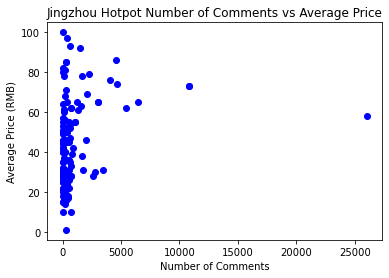

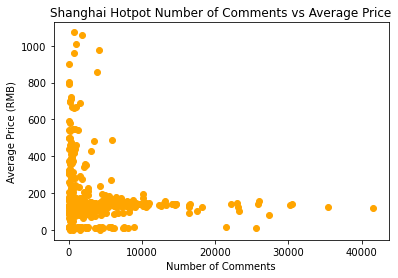

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(jz.comment, jz.avg_price, c='blue')
plt.title('Jingzhou Hotpot Number of Comments vs Average Price')
plt.xlabel('Number of Comments')
plt.ylabel('Average Price (RMB)')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(sh.comment, sh.avg_price, c='orange')
plt.title('Shanghai Hotpot Number of Comments vs Average Price')
plt.xlabel('Number of Comments')
plt.ylabel('Average Price (RMB)')
plt.show()

Finally, we look into the rest of the characteristics made available by Hotpot customers on Dianping.com, these attributes specifically include ratings on resturants' `taste`, `environment` and `services`.

From the graph below, we see that the ratings on `taste`, `environment` and `services` follow a similar distribution for Jingzhou and Shanghai. For Shanghai, most ratings on `taste`, `environment` and `services` fall between 8 and 9 out of 10, with a peak at 9. For Jingzhou, most ratings on `taste`, `environment` and `services` fall between 6.5 and 8 out of 10, with a peak at 7. Besides, we can also see that the `average price` differ significantly for Jingzhou and Shanghai. The average prices of all Jingzhou's hotpot restaurants fall between 0 - 150, with a peak at around 70. However, the average prices of Shanghai's hotpot restaurants range from 0 to 1200, with most average prices between 0 - 300 and a peak at around 120.

<Figure size 432x288 with 0 Axes>

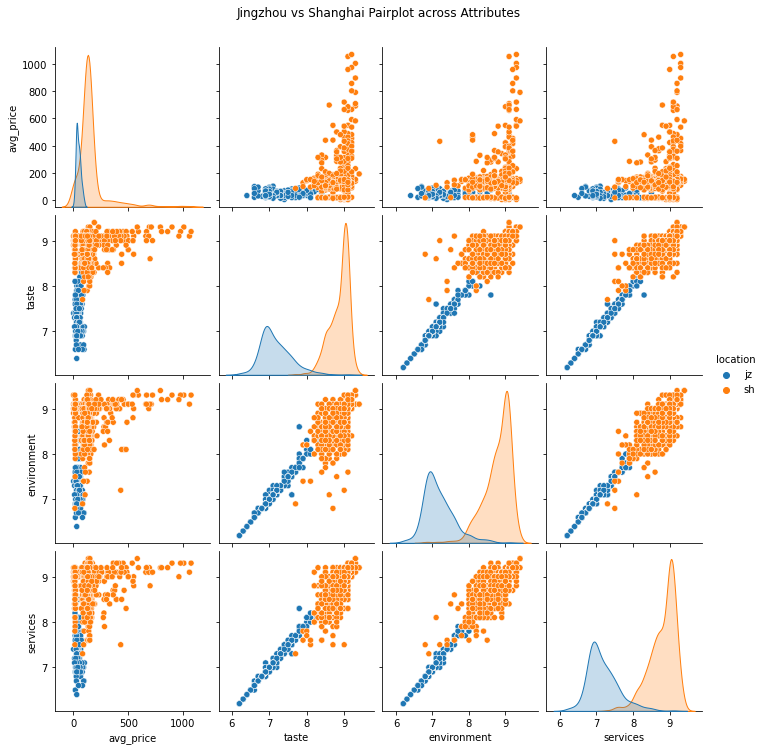

In [29]:
plt.figure()
sns.pairplot(df[['avg_price', 'taste', 'environment',
       'services','location']], hue='location')
plt.suptitle('Jingzhou vs Shanghai Pairplot across Attributes',y=1.04)
plt.show()

With insights derived from exploratory data analysis above, we have a more comprehensive understanding on `avg_price`'s relation with other features in the dataset, and we therefore proceed with dealing with the rest of the missing data in Jingzhou's dataset.

It is found that hot pot places' average price is highly related to its location (i.e. Jingzhou or Shanghai here), and is also greatly affected by customer's different evaluations on each of the attributes. On this ground, it might not be as rigorous to simply impute data with mean values in each column as each entry's value is affected by evaluated conditions in other features. We therefore proceed with KNN imputation, which finds the k-nearest neighbors in the dataset for mean value computation imputation. This imputation brings other features into consideration when performing the imputation and is therefore utilized. Here we specify k to be 2 because hot pot restaurants are each distinct, finding top 2 similar hot pot places but not higher is believed to be a reasonable comparison based on our experiences in real life scenarios.

In [30]:
imputer = KNNImputer(n_neighbors=2)
features = list(jz.columns[1:])
jz[features] = imputer.fit_transform(jz[features])
df = pd.concat([jz.assign(location=['jz']*len(jz)), sh.assign(location=['sh']*len(sh))])
display(jz.head(2))
display(sh.head(2))

,name,star,comment,avg_price,taste,environment,services,recommend
0,鲜蒸牛肉特色餐厅(园林北路店),3.5,9.0,31.5,7.5,7.5,7.5,3.0
1,王保长刀叉牛肉,4.0,241.0,31.0,8.0,8.0,8.0,3.0


,name,star,comment,avg_price,taste,environment,services,recommend
0,蜀城巷子老成都火锅(宜山路店),4.5,545,122,8.6,8.4,8.5,3
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),5.0,602,313,8.8,9.1,9.0,3


Now that dataset is fully imputed, we look again into the `avg_price`, and cut the prices into individual bins. Inspecting Jingzhou and Shanghai's binned average spending, this approach is hoped to reveal a little about first-tier vs third-tier cities' average consumption level.

Also, `comment` feature is the number of comments left in regards to each hot-pot place listing. If we consider the usual case that one/a group of customers make one comment on one visit (i.e. one bill/one spending), then we may also think of `comment` as lending an idea into a general representation of the number of times of spendings at each restaurant.

From the graph below we see almost all restaurants in Jingzhou have consumption levels between 0-100. On the other hand, most restaurants in Shanghai have consumption levels between 101-200, while for the rest more of their consumption levels fall in 0-100 than 200+. This pattern is consistent with the distribution of times of spending with respect to consumption level for both cities. One noticeable feature is that for Shanghai, although the number of restaurants with consumption level 200+ is about 1/2 of that with consumption level between 0-100, the times of spending in 200+ restaurants is around 1/3 of 0-100 restaurants. This is consistent with our life experience that people do not often go to restaurants that are too expensive. In comparison, in Jingzhou, although the number of restaurants with consumption level 0-50 is about twice of that with consumption level between 51-100, the times of spending in 0-50 restaurants is less than a half of 51-100 restaurants. This shows that people tend to prefer better (but not too expensive) restaurants when enjoying hotpots.

P.S. This idea references idea made available [here](https://zhuanlan.zhihu.com/p/39680746).

In [31]:
bins = [0, 50, 100, 200, 400, 1100]
bin_label = ['0-50', '51-100', '101-200', '201-400', '400+']
df = df.assign(consumption_level=pd.cut(df.avg_price, bins=bins, labels=bin_label, right=True, include_lowest=True, ordered=True))

In [32]:
cn_df = df.groupby(['location','consumption_level'])['name'].count().to_frame().rename(columns={'name': 'restaurant count'})
sp_df = df.groupby(['location','consumption_level'])['comment'].sum().to_frame().rename(columns={'comment': 'times of spending'})
cn_df = cn_df.fillna(0).astype(int)
sp_df = sp_df.fillna(0).astype(int)

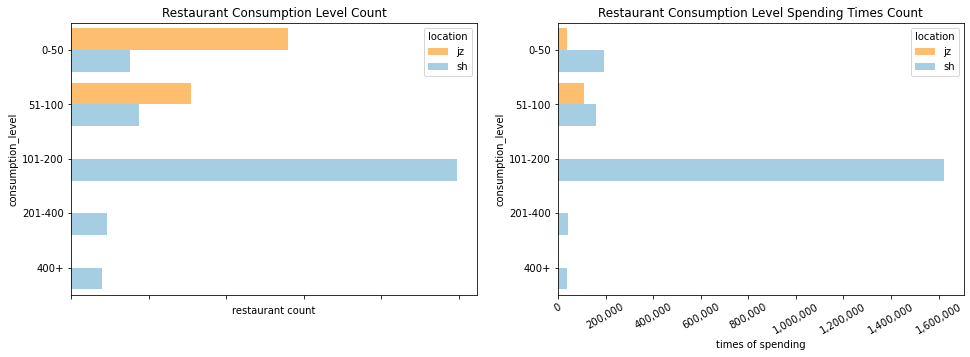

In [33]:
from IPython import display

# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display.display(cn_df.style.set_caption('Restaurant Consumption Level Count'))
with widget2:
    display.display(sp_df.style.set_caption('Restaurant Consumption Level Spending Times Count'))


# add some CSS styles to distribute free space
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='auto')

# create Horisontal Box container
hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
from IPython.display import display
display(hbox)

# visualize result
fig = plt.figure(figsize=(16, 5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

sns.barplot(y='consumption_level',
            x='restaurant count',
            data=cn_df.reset_index(),
            hue='location',
            palette={'jz':'#fdbf6f','sh':'#a6cee3'},
            saturation=1, ax=ax1)


sns.barplot(y='consumption_level',
            x='times of spending',
            data=sp_df.reset_index(),
            hue='location',
            palette={'jz':'#fdbf6f','sh':'#a6cee3'},
            saturation=1, ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax2.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax1.set_title('Restaurant Consumption Level Count')
ax2.set_title('Restaurant Consumption Level Spending Times Count')
plt.show()

We are curious about an "overall" relationship between `avg_price` and ratings given by customers, namely: `taste`, `environment` and `services`. Therefore, we save an additional "overall scoring" computed by the average over the three ratings in an extra column `overall`.

`Overall` can therefore be thought of which to carry the notion of "cost performance ratio" in our setting. In this case, looking into this feature's relation with `avg_price` is believed to convey an insightful "big-picture".

As shown below, Jingzhou restaurants' overall scores have a distribution skewed to the right while Shanghai restaurants' overall scores have a distribution skewed to the left. For Jingzhou, most ratings on taste, environment and services fall between 6.5 and 8 out of 10, with a peak at 7. For Shanghai, most ratings on taste, environment and services fall between 8 and 9.5 out of 10, with a peak at 9. The overall score of Shanghai restaurants are generally higher than that of Jingzhou restaurants'.

In [34]:
df = df.assign(overall=round(df[['taste','environment','services']].mean(axis=1),2))

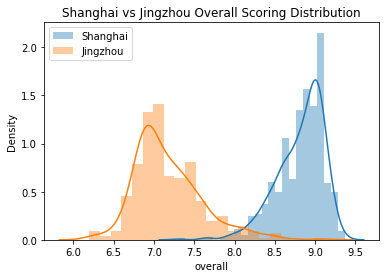

In [36]:
plt.figure()
sns.distplot(df[df.location=='sh'].overall,label='Shanghai')
sns.distplot(df[df.location=='jz'].overall,label='Jingzhou')
plt.legend()
plt.title('Shanghai vs Jingzhou Overall Scoring Distribution')
plt.show()

In order to dive deeper into studying the three variables' "overall" relationship with `avg_price`, it is important to firstly understand the three variables' inter-relation (if there is any). We do this by looking at the three attibutes' relation with `star` rating. Where `taste`, `environment`, and `services` sets particular subject for customers to comment on, `star` does not and is usually treated as an "overall" scoring customers would like to give to the restaurant on a range of 0-5. It is usually the case that a highly recommended resturant would have a generally high score in all three scorings, and following this, the `star` rating will come closer to 5 as well.

Below, we leverage unsupervised learning in hope of identifying unknown groupings when the four attibutes discussed above are taken into consideration.

Using K-Means for clustering, the algorithm groups the data according to its learned pattern. Here, we specify to include 3 clusters (e.g. grouping 4-dimentional features into a new 3-d space). This way, `star` rating is written into the spacial conditions along the 3 axes, and therefore this new graph also transmits the idea of "recommended restaurant" or not. We therefore name the three clusters "highly recommended", "recommended" and "not recommended" manually by inspecting each individual groupings with regards to each plot. And by plotting the three groups along this feature space constructed by `taste`, `environment`, `services`, we visualize how the each recommended group is different along the three scoring dimensions.

P.S. This approach references idea made available from [KOTO](https://www.heywhale.com/home/user/profile/5ddb3f9d249294002d4e035f).

With knowledge on Shanghai and Jingzhou's restaurant ratings distribution difference in mind (derived in analysis above), we perform clusterings seperately, i.e. kmeans fitted to Shanghai's dataset and Jingzhou's dataset.

From the graph below we see a general trend that the higher a restaurant score in all of the three variables (`taste`, `environment`, and `services`), the more recommanded a restaurant is. This trend is more clear in the distribution of dots generated in the graph for Jingzhou. In the graph for Shanghai, the dots are more scattered. We can see examples that are high (around 9) in one variable but low (around 7.5) in the other two. These examples will not be more recommanded than examples with all three variables low. However, examples with two variables high and the other one low may get more recommanded than examples with all three variables low. In general, the higher a restaurant scores in all three (or at least two) variables, the more likely it is recommanded (has a higher `star` rating).

In [37]:
km = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [38]:
cols = ['star', 'taste', 'environment', 'services']

# fit to shanghai
sh_km = sh[cols]
km.fit(sh_km)
label_sh = km.labels_

# fit to jingzhou
jz_km = jz[cols]
km.fit(jz_km)
label_jz = km.labels_

# fit to all
df_km = df[cols]
km.fit(df_km)
label_df = km.labels_

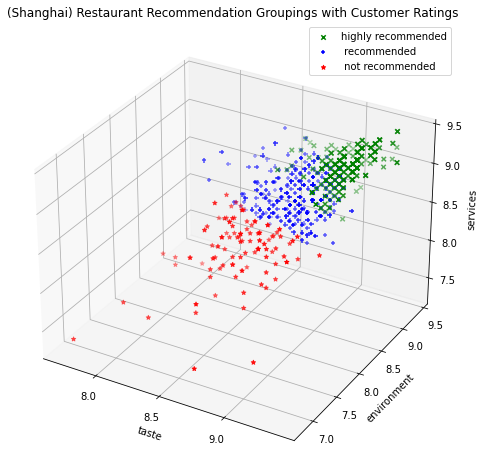

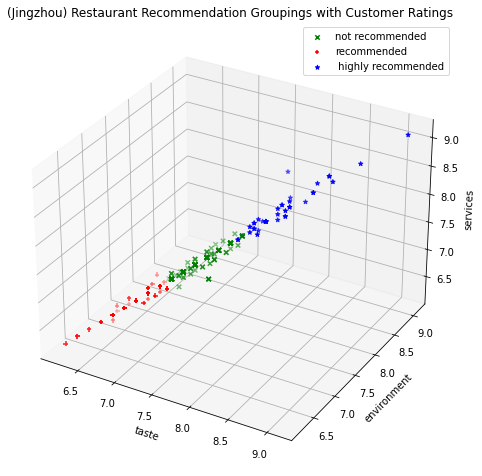

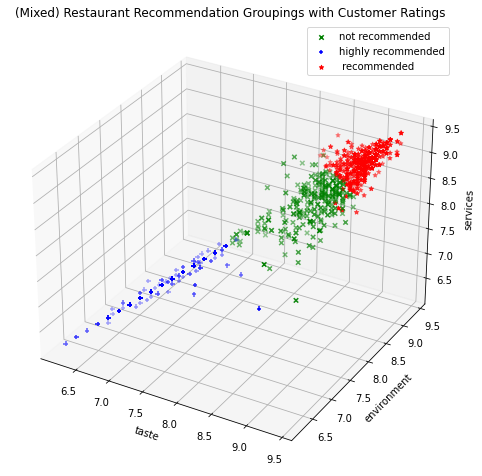

In [54]:
# sh
x_1, x_2, x_3 = sh_km[label_sh==0], sh_km[label_sh==1], sh_km[label_sh==2]

fig=plt.figure(figsize=(8,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x_1['taste'], x_1['environment'], x_1['services'], c = "green", marker='x', label='highly recommended')
ax.scatter(x_2['taste'], x_2['environment'],x_2['services'],  c = "blue", marker='+', label=' recommended')
ax.scatter(x_3['taste'], x_3['environment'],x_3['services'],  c = "red", marker='*', label=' not recommended')

ax.set_xticks(np.arange(6.0, 10, 0.5))
ax.set_yticks(np.arange(6.0, 10, 0.5))
ax.set_zticks(np.arange(6.0, 10, 0.5))

ax.set_xlabel('taste')
ax.set_ylabel('environment')
ax.set_zlabel('services')
plt.legend()#显示标签

plt.title('(Shanghai) Restaurant Recommendation Groupings with Customer Ratings')
plt.show()

# jz
x_1, x_2, x_3 = jz_km[label_jz==0], jz_km[label_jz==1], jz_km[label_jz==2]

fig=plt.figure(figsize=(8,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x_1['taste'], x_1['environment'], x_1['services'], c = "green", marker='x', label='not recommended')
ax.scatter(x_2['taste'], x_2['environment'],x_2['services'],  c = "red", marker='+', label='recommended')
ax.scatter(x_3['taste'], x_3['environment'],x_3['services'],  c = "blue", marker='*', label=' highly recommended')

ax.set_xticks(np.arange(6.0, 10, 0.5))
ax.set_yticks(np.arange(6.0, 10, 0.5))
ax.set_zticks(np.arange(6.0, 10, 0.5))

ax.set_xlabel('taste')
ax.set_ylabel('environment')
ax.set_zlabel('services')
plt.legend()#显示标签

plt.title('(Jingzhou) Restaurant Recommendation Groupings with Customer Ratings')
plt.show()

# all
x_1, x_2, x_3 = df_km[label_df==0], df_km[label_df==1], df_km[label_df==2]

fig=plt.figure(figsize=(8,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x_1['taste'], x_1['environment'], x_1['services'], c = "green", marker='x', label='not recommended')
ax.scatter(x_2['taste'], x_2['environment'],x_2['services'],  c = "blue", marker='+', label='highly recommended')
ax.scatter(x_3['taste'], x_3['environment'],x_3['services'],  c = "red", marker='*', label=' recommended')

ax.set_xticks(np.arange(6.0, 10, 0.5))
ax.set_yticks(np.arange(6.0, 10, 0.5))
ax.set_zticks(np.arange(6.0, 10, 0.5))

ax.set_xlabel('taste')
ax.set_ylabel('environment')
ax.set_zlabel('services')
plt.legend()#显示标签

plt.title('(Mixed) Restaurant Recommendation Groupings with Customer Ratings')
plt.show()

Below, we take a further step to look at recommended dishes in Shanghai and Jingzhou respectively. In particular, we leverage the use of word cloud to visualize "most recommended" dishes in the two cities respectively.
<br>P.S. Making of wordcloud references report made available by Yeung Wong [here](https://medium.com/@yeung_cyda/written-in-chinese-step-by-step-chinese-word-cloud-with-python-53f57f65be69).

In [40]:
jz_dishes, sh_dishes = [], []
for i in jz_dish.recommend:
    jz_dishes.extend(i.split(','))
for i in sh_dish.recommend:
    sh_dishes.extend(i.split(','))

In [41]:
jz_dishes = [i for i in jz_dishes if i != '']
for i in range(len(jz_dishes)):
    if '【' in jz_dishes[i]:
        idx = jz_dishes[i].index('【')
        jz_dishes[i] = jz_dishes[i][:idx]

sh_dishes = [i for i in sh_dishes if i != '']
for i in range(len(sh_dishes)):
    if '【' in sh_dishes[i]:
        idx = sh_dishes[i].index('【')
        sh_dishes[i] = sh_dishes[i][:idx]

In [42]:
jz_food_text = ' '.join(jz_dishes)
sh_food_text = ' '.join(sh_dishes)

In [43]:
with open('data/jz_food.txt', 'w') as f:
    f.write(jz_food_text)
    f.close()
with open('data/sh_food.txt', 'w') as f:
    f.write(sh_food_text)
    f.close()

In [44]:
jz_text = open('data/jz_food.txt','r',encoding= 'UTF-8-sig').read()
sh_text = open('data/sh_food.txt','r',encoding= 'UTF-8-sig').read()

In [45]:
text_sh = ' '.join(jieba.cut(jz_text))
text_jz = ' '.join(jieba.cut(sh_text))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.998 seconds.
Prefix dict has been built successfully.


In [46]:
font_path="wordcloud/PingFang-SC-Regular.ttf"

In [47]:
icon_path = 'wordcloud/hp1.png'
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGBA", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [48]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(OrRd_9.colors[random.randint(0,8)])

In [49]:
wc = WordCloud(font_path = font_path,
               background_color="black",
               mask=mask,
               max_words=300,
               max_font_size=40,
               contour_width=2,
               contour_color='darkorange',
               random_state=42)

Displayed below, are the wordcloud visualizations of Shanghai and Jingzhou's most recommended dishes respectively.

Translation of some of the most recommended dishes:
牛肉 - beef
毛肚 - beef tripe
虾滑 - shrimp paste balls
鸳鸯锅 - two-flavor hot pot

We see that for either Shanghai or Jingzhou, there exists a large variety of dishes for hot pots, with most of them  in common. We also find that many people prefer two-flavor hot pot, and beef and shrimp are the most popular dishes in hot pots. These facts are consistent with our life experience. 

Shanghai Hot-Pot Dishes Word Cloud


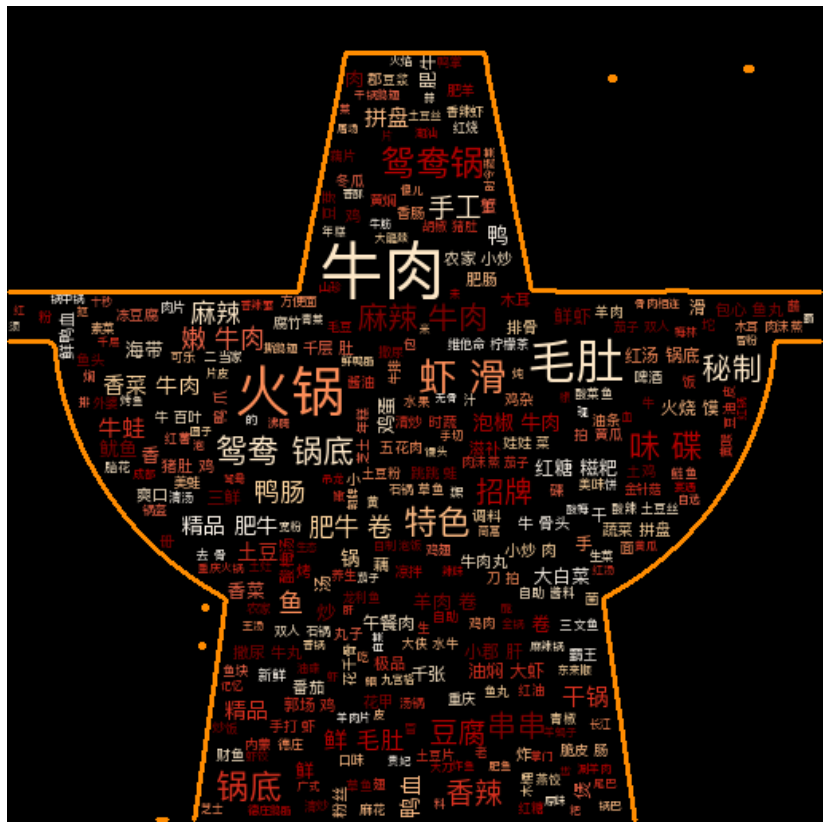

Jingzhou Hot-Pot Dishes Word Cloud


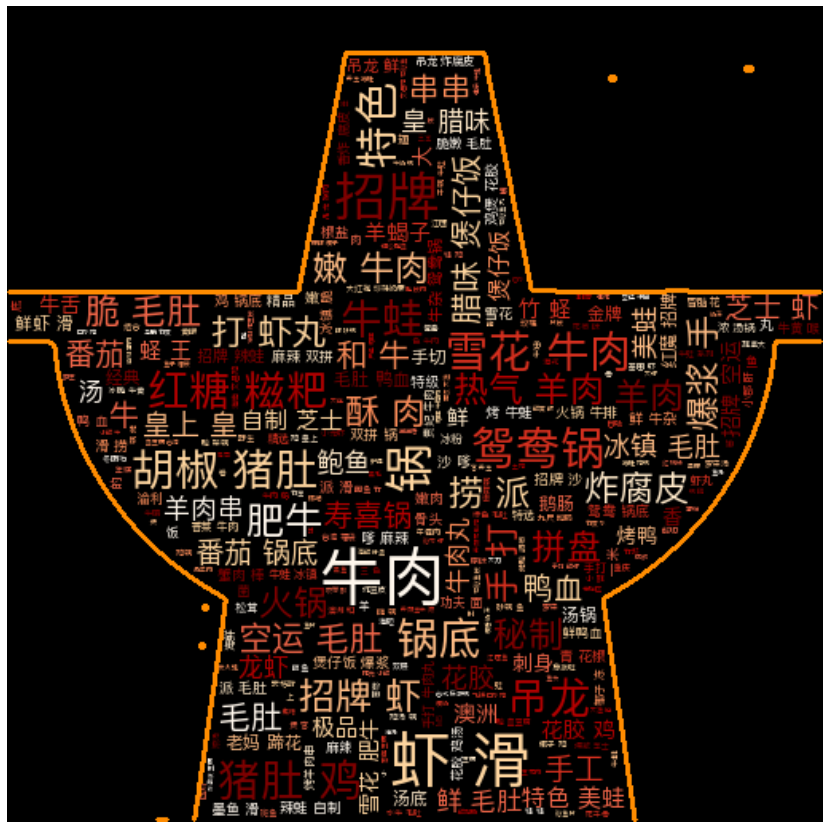

In [50]:
wc.generate_from_text(text_sh)
wc.recolor(color_func=color_func, random_state=2)

# display shanghai word cloud
print('Shanghai Hot-Pot Dishes Word Cloud')
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

wc.generate_from_text(text_jz)
wc.recolor(color_func=color_func, random_state=2)

# display jingzhou word cloud
print('Jingzhou Hot-Pot Dishes Word Cloud')
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

# Ethics & Privacy

Since our topic is about the comparing catering business of Hot Pot in different cities based on customer evaluations, there may be no concerns of personal data leakage because we will collect the customer data based on their published ratings on social media platforms. Our data will be focusing on populations from Shanghai and Jingzhou in China, as we aim to compare the customer ratings on hot pot in these two cities, and we believe such comparisons should not cause any potential problems. However, there will be limitations in our data as we are collecting reviews only from the app users, but not all people in our targeted cities. Also, one potential bias related to this fact is that the app maybe more popular in one region than another, which may cause it hard for generalization of our conclusion.

One potential issue related to our data collection is that we may not have the terms of uses to collect data from the app Dazhongdianping as it’s their own customer data, we may have to use external Python programs to extract data. Also, it is unsure how our data program will affect the hot pot businesses in both regions if it is published, as the most nicely commented restaurant may benefit from our data reports.

We feel that the privacy of the users not be violated as we won’t be able to identify the users based on their ratings of restaurants, we are only collecting the ratings related to restaurants and their demographical data.

# Conclusion & Discussion

This project aims to examine the datasets of hotpots in Jingzhou and Shanghai based on star ranking, the amount of comments, average price, environment, tastes and services. From the above analysis, we know that restaurants in Jingzhou have lower average prices than ones in Shanghai by using univariate analysis. Also, from bivariate analysis, we use violin plot and find that jingzhou’ star ratings are concentrated around 3-4 stars while Shanghai's star ratings are concentrated around 4-5 stars. We also use scatter plots to demonstrate the relationship between number of comments and average prices and we conclude that there is a general trend between two variables: when the restaurant have tend to have more comments when the average prices are lower.this shows that people are more likely to spend money at restaurants that are not too expensive. Using k-means clustering to split the data into 3 groups, we recognized that when the restaurants have higher ratings of taste, environment, and services, they have better chances to get recommendations. Lastly, we use the word cloud visualizations to represent the most popular dishes in Shanghai and Jingzhou.  Furthermore, we should always keep in mind that the data collection is somehow different for Shanghai and Jingzhou restaurants. More importantly, we should notice that this project only collects a certain amount of data samples and the data analysis may not be applied to every restaurant in China. In conclusion, our project can somehow play a beneficial role in analyzing the overall relationships among ratings, taste, prices, services and etc for various restaurants in China; providing a reference for people who want to compare the hot pot restaurants in shanghai and Jingzhou; and even examining the generalizability of such studies in the future research.

# Team Contributions

All team members participated in weekly meetings for project updates. In addition, each individual member's contribution are as follows:
- Jou-Ying Lee: Contributed greatly to coding, analysis and visualziation tasks. Also contributed to corresponding sections in report writing.
- Niehao Chen: Contributed greatly to project analysis content and report writing.
- Junwei Chen: Contributed greatly to analysis and visualization tasks. Also contributed to corresponding portions in report writing.
- Dandan Liu: Contributed greatly to interpret some data visualization tasks(scatter plots) and conlusion part.
- Wanting Yang: Contributed to part of the analysis section, including the analysis of the violin graphs; also in charged of refining Background & Prior Work, Datasets, and Hypothesis sections in report writting. Wrote Ethics & Privacy section.